# 21stCenturyWeather Flagship rAM3 domains

In [3]:
# Developed by Scott Wales at CLEX

from pathlib import Path
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot

def plot_region(ax, name: str, centre: T.Tuple[float, float], res: T.Tuple[float, float], size: T.Tuple[int, int], pole: T.Tuple[float, float]=(90,180), rim: int=9, halo: T.Tuple[int, int]=(7,7), **kwargs):
    """
    Plots a LAM region, including its rim and halo
    """
    
    corners = draw_box_centre_size(ax, name, centre, res, size, pole, **kwargs)
    
    rim_size = [size[0]-rim*2, size[1]-rim*2]
    draw_box_centre_size(ax, name + '_rim', centre, res, rim_size, pole, ls='--', **kwargs)
    
    halo_size = [size[0]+halo[0]*2, size[1]+halo[1]*2]
    draw_box_centre_size(ax, name + '_halo', centre, res, halo_size, pole, ls=':', **kwargs)

    return corners

def draw_box_centre_size(ax, name: str, centre: T.Tuple[float, float], res: T.Tuple[float, float], size: T.Tuple[int, int], pole: T.Tuple[float, float]=(90,180), **kwargs):
    """
    Draws a box given its centre and size
    """
    size_lon = res[1] * size[1]
    size_lat = res[0] * size[0]

    draw_box_corners(ax, name, corners=[centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2], pole=pole, **kwargs)

    return [centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2]

def draw_box_corners(ax, name: str, corners: T.Tuple[float, float, float, float], pole: T.Tuple[float, float]=(90,180), **kwargs):
    """
    Draws a box given its corners
    """
    x0,x1,y0,y1 = corners
    
    lons = numpy.linspace(x0,x1)
    lats = numpy.linspace(y0,y1)
        
    crs = ccrs.RotatedGeodetic(pole[1], pole[0])
    ax.plot(lons, [y0]*lons.size, transform=crs, **kwargs, label=name) 
    ax.plot(lons, [y1]*lons.size, transform=crs, **kwargs) 
    ax.plot([x0]*lats.size, lats, transform=crs, **kwargs) 
    ax.plot([x1]*lats.size, lats, transform=crs, **kwargs)


def print_corners(centre,res,size):
    """
    print corners of domain for a centre, res and size
    """
    size_lon = res[1] * size[1]
    size_lat = res[0] * size[0]

    corners=[centre[1]-size_lon/2, centre[1]+size_lon/2, centre[0]-size_lat/2, centre[0]+size_lat/2]

    print (f'For {centre} with {res} and {size}: \ncoords = {corners[0]:.3f}, {corners[1]:.3f}, {corners[2]:.3f}, {corners[3]:.3f}')


Let's draw some domain boundaries just by specifying the lat/lon extents.

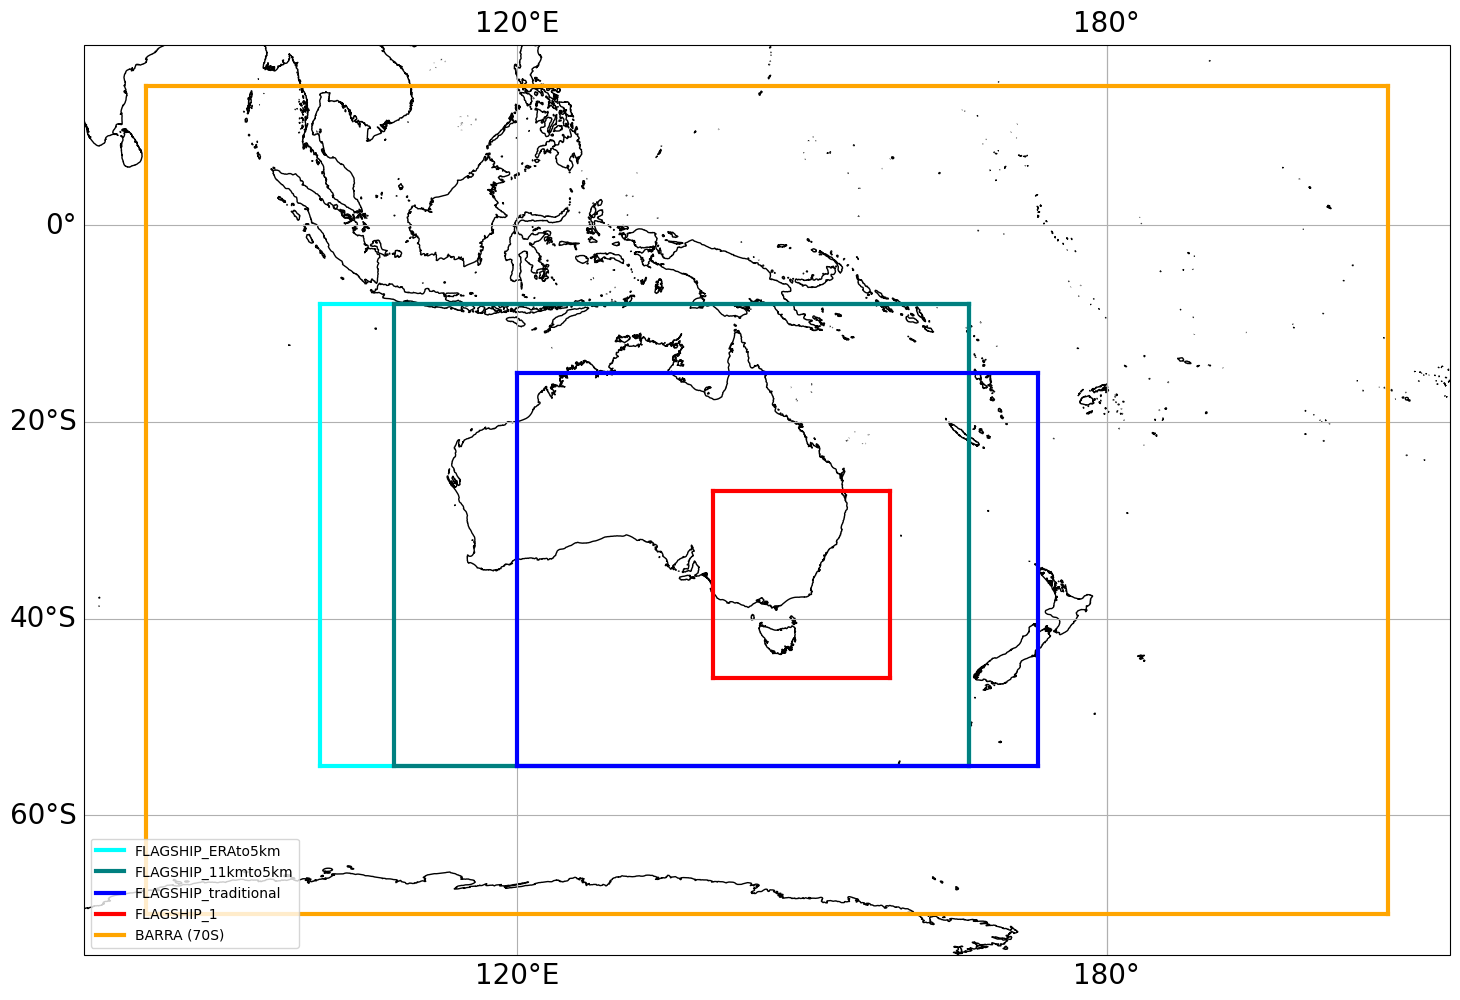

In [4]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
ax.gridlines(draw_labels=True)

draw_box_corners(ax, 'FLAGSHIP_ERAto5km', corners=[100,166,-8,-55], color='aqua',linewidth=3)
draw_box_corners(ax, 'FLAGSHIP_11kmto5km', corners=[107.5,166,-8,-55], color='teal',linewidth=3)
draw_box_corners(ax, 'FLAGSHIP_traditional', corners=[120,173,-15,-55], color='blue',linewidth=3)
draw_box_corners(ax, 'FLAGSHIP_1', corners=[140,158,-27,-46], color='red',linewidth=3)
draw_box_corners(ax, 'BARRA (70S)', corners=[82.27,208.6,14.19,-70], color='orange',linewidth=3)

ax.coastlines('10m')
ax.legend(loc='lower left');
plt.rcParams.update({'font.size':20})
plt.tight_layout()
plt.savefig('Flagship_5km_options.png')

Now let's compute these domains using the UM reconfiguration parameters (centre, resolution and number of points)

In [7]:
# Flagship 1-km domain. Target domain is [140,158,-27,-46]

FLAGSHIP_1_CENTRE=[-36.5,149]
FLAGSHIP_1_RES=[0.009,0.009]
FLAGSHIP_1_SIZE=[2111,2000]

print_corners(FLAGSHIP_1_CENTRE, FLAGSHIP_1_RES, FLAGSHIP_1_SIZE)

For [-36.5, 149] with [0.009, 0.009] and [2111, 2000]: 
coords = 140.000, 158.000, -45.999, -27.001


In [8]:
# Flagship 11kmto5km domain. Target domain is [107.5,166,-8,-55]

inner_ew=(166-107.5)
inner_ns=(55-8)
ew_centre = 107.5+inner_ew/2
ns_centre=8+inner_ns/2

print (ew_centre,ns_centre)

FLAGSHIP_11kmto5km_CENTRE=[-31.5,136.75]
FLAGSHIP_11kmto5km_RES=[0.045,0.045]
FLAGSHIP_11kmto5km_SIZE=[1044,1300]

print_corners(FLAGSHIP_11kmto5km_CENTRE, FLAGSHIP_11kmto5km_RES, FLAGSHIP_11kmto5km_SIZE)

136.75 31.5
For [-31.5, 136.75] with [0.045, 0.045] and [1044, 1300]: 
coords = 107.500, 166.000, -54.990, -8.010


In [9]:
# Flagship ERAto5km domain. Target domain is [100,166,-8,-55]

inner_ew=(166-100.)
inner_ns=(55-8)
ew_centre = 100.+inner_ew/2
ns_centre=8+inner_ns/2

print (ew_centre,ns_centre)

FLAGSHIP_ERAto5km_CENTRE=[-31.5,133.0]
FLAGSHIP_ERAto5km_RES=[0.045,0.045]
FLAGSHIP_ERAto5km_SIZE=[1044,1467]

print_corners(FLAGSHIP_ERAto5km_CENTRE, FLAGSHIP_ERAto5km_RES, FLAGSHIP_ERAto5km_SIZE)

133.0 31.5
For [-31.5, 133.0] with [0.045, 0.045] and [1044, 1467]: 
coords = 99.993, 166.007, -54.990, -8.010


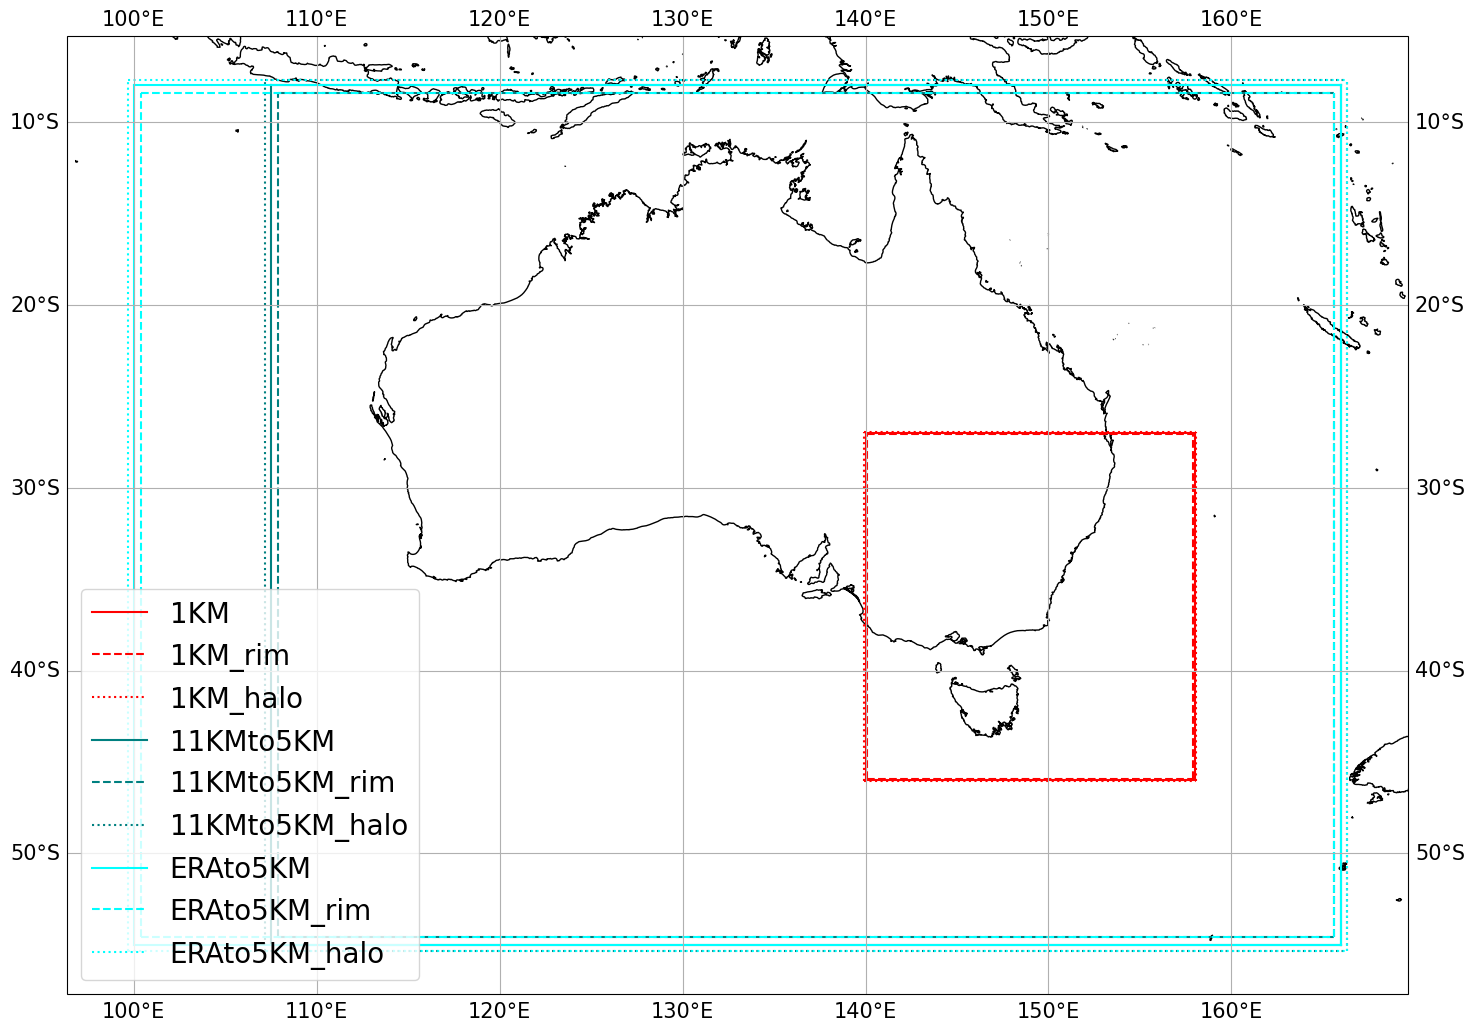

In [10]:
# Re-plot using UM reconfiguration parameters

plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
flagship_1km_coords = plot_region(ax, '1KM', centre=FLAGSHIP_1_CENTRE, res=FLAGSHIP_1_RES, size=FLAGSHIP_1_SIZE, color='r')
flagship_11kmto5km_coords = plot_region(ax, '11KMto5KM', centre=FLAGSHIP_11kmto5km_CENTRE, res=FLAGSHIP_11kmto5km_RES, size=FLAGSHIP_11kmto5km_SIZE, color='teal')
flagship_ERAto5km_coords = plot_region(ax, 'ERAto5KM', centre=FLAGSHIP_ERAto5km_CENTRE, res=FLAGSHIP_ERAto5km_RES, size=FLAGSHIP_ERAto5km_SIZE, color='cyan')
ax.gridlines(draw_labels=True)

ax.coastlines('10m')
ax.legend(loc='lower left');
plt.rcParams.update({'font.size':15})
plt.tight_layout()